# Question 3

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# QUESTION 3
print('QUESTION 3')

QUESTION 3


In [3]:
# PART A
print('PART A')

PART A


In [4]:
def tuning_curve(x, A, mu, sigma):
    """
    Gaussian shaped tuning function of a population of neurons.
    Args:
        x: The input stimulus
        A: Amplitude of the Gaussian-shaped tuning curve
        mu: Mean of the Gausssian-shaped tuning curve
        sigma: Standard deviation of the Gaussian-shaped tuning curve
    Returns:
        response: Resulting neural response
    """
    response = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return response

In [5]:
A = 1 # amplitude
SIGMA = 1 # standard deviation
NUM_NEURONS = 21
MU_VALS = np.arange(-10, 11)
STIMULI = np.linspace(-15, 16, 500)

In [6]:
activities = []
for mu in MU_VALS:
    activities.append(tuning_curve(STIMULI, A, mu, SIGMA))

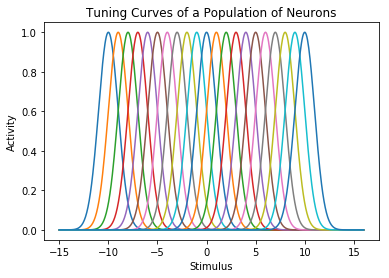

In [7]:
figure_num = 0
plt.figure(figure_num)
figure_num += 1
for i in range(NUM_NEURONS):
    plt.plot(STIMULI, activities[i])
plt.xlabel('Stimulus')
plt.ylabel('Activity')
plt.title('Tuning Curves of a Population of Neurons')
plt.show(block=False)

In [8]:
X = -1

In [9]:
responses = tuning_curve(X, A, MU_VALS, SIGMA)

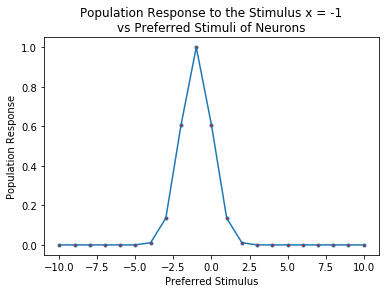

In [10]:
plt.figure(figure_num)
figure_num += 1
plt.xlabel('Preferred Stimulus')
plt.ylabel('Population Response')
plt.title('Population Response to the Stimulus x = -1\nvs Preferred Stimuli of Neurons')
plt.plot(MU_VALS, responses, marker='.', markerfacecolor='red')
plt.show(block=False)

In [11]:
# PART B
print('PART B')

PART B


In [12]:
NUM_TRIALS = 200
STIMULI_RANGE = np.linspace(-5, 5, 500)

In [13]:
def winner_take_all_decoder(preferred_stimuli, response):
    """
    Given a population response and preferred stimuli of the
    neurons, estimates the actual stimulus as the preferred
    stimulus of the neuron exhibiting the highest response.
    Args:
        preferred_stimuli: The preferred stimuli of the neurons
        response: The response the population exhibits
    Returns:
        stimulus: the estimated input stimulus
    """
    highest_idx = np.argmax(response)
    stimulus = preferred_stimuli[highest_idx]
    return stimulus

In [14]:
np.random.seed(17) # for reproducibility
responses = []
stimuli = []
estimated_stimuli_WTA = []
errors_WTA = []
for i in range(NUM_TRIALS):
    stimulus = np.random.choice(STIMULI_RANGE)
    response = tuning_curve(stimulus, A, MU_VALS, SIGMA)
    noise = np.random.normal(0, SIGMA / 20, NUM_NEURONS)
    response += noise
    estimated_stimulus_WTA = winner_take_all_decoder(MU_VALS, response)
    error_WTA = np.abs(stimulus - estimated_stimulus_WTA)
    responses.append(response)
    stimuli.append(stimulus)
    estimated_stimuli_WTA.append(estimated_stimulus_WTA)
    errors_WTA.append(error_WTA)

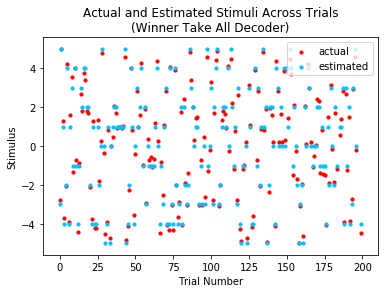

In [15]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(np.arange(NUM_TRIALS), stimuli, color='r', s=10)
plt.scatter(np.arange(NUM_TRIALS), estimated_stimuli_WTA, color='deepskyblue', s=10)
plt.xlabel('Trial Number')
plt.ylabel('Stimulus')
plt.title('Actual and Estimated Stimuli Across Trials\n(Winner Take All Decoder)')
plt.legend(['actual', 'estimated'], loc='upper right')
plt.show(block=False)

In [16]:
mean_error_WTA = np.mean(errors_WTA)
std_error_WTA = np.std(errors_WTA)
print('Error Statistics for Winner Take All Decoder')
print('Mean of errors in stimuli estimation (absolute error is used):', mean_error_WTA)
print('Standard deviation of errors in stimuli estimation (absolute error is used):', std_error_WTA)

Error Statistics for Winner Take All Decoder
Mean of errors in stimuli estimation (absolute error is used): 0.22927855711422843
Standard deviation of errors in stimuli estimation (absolute error is used): 0.1526404626792791


In [17]:
# PART C
print('PART C')

PART C


In [18]:
def nlogLL(x, response, A, mu_vals, sigma):
    """
    Given the input stimulus x, the response elicited by the neuron 
    population and the tuning curve parameters; computes the negative
    of the log-likelihood of seeing the given population response.
    Disregards some constant terms for simplicity.
    Args:
        x: The input stimulus
        response: The response elicited by the neuron population
        A: Amplitude of the tuning curve
        mu_vals: Preferred stimulus value of each neuron in the population
        sigma: Standard deviation of the tuning curve
    Returns:
        nlogLL: The negative log-likelihood to see the given response
    """
    nlogLL = 0
    for r_i, mu_i in zip(response, mu_vals):
        nlogLL += (r_i - tuning_curve(x, A, mu_i, sigma)) ** 2
    return nlogLL

In [19]:
def MLE_decoder(response, A, mu_vals, sigma, stimuli_range):
    """
    Estimates the input stimulus to a neuron population by maximizing
    the likelihood to see the given population response.
    Args:
        response: The response elicited by the neuron population
        A: Amplitude of the tuning curve
        mu_vals: Preferred stimulus value of each neuron in the population
        sigma: Standard deviation of the tuning curve
        stimuli_range: Range of stimuli to consider
    Returns:
        est_stimulus: The estimated input stimulus
    """
    nlogLL_vals = []
    for stimulus in stimuli_range:
        nlogLL_vals.append(nlogLL(stimulus, response, A, mu_vals, sigma))
    min_idx = np.argmin(nlogLL_vals)
    est_stimulus = stimuli_range[min_idx]
    return est_stimulus

In [20]:
estimated_stimuli_MLE = []
errors_MLE = []
for response, stimulus in zip(responses, stimuli):
    estimated_stimulus_MLE = MLE_decoder(response, A, MU_VALS, SIGMA, STIMULI_RANGE)
    error_MLE = np.abs(stimulus - estimated_stimulus_MLE)
    estimated_stimuli_MLE.append(float(estimated_stimulus_MLE))
    errors_MLE.append(float(error_MLE))

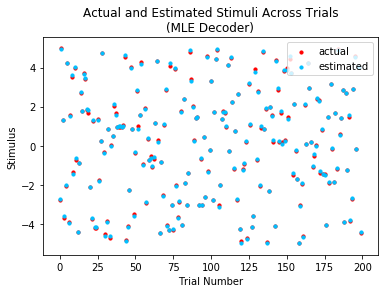

In [21]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(np.arange(NUM_TRIALS), stimuli, color='r', s=10)
plt.scatter(np.arange(NUM_TRIALS), estimated_stimuli_MLE, color='deepskyblue', s=10)
plt.xlabel('Trial Number')
plt.ylabel('Stimulus')
plt.title('Actual and Estimated Stimuli Across Trials\n(MLE Decoder)')
plt.legend(['actual', 'estimated'], loc='upper right')
plt.show(block=False)

In [22]:
mean_error_MLE = np.mean(errors_MLE)
std_error_MLE = np.std(errors_MLE)
print('Error Statistics for MLE Decoder')
print('Mean of errors in stimuli estimation (absolute error is used):', mean_error_MLE)
print('Standard deviation of errors in stimuli estimation (absolute error is used):', std_error_MLE)

Error Statistics for MLE Decoder
Mean of errors in stimuli estimation (absolute error is used): 0.04228456913827656
Standard deviation of errors in stimuli estimation (absolute error is used): 0.03423218782611939


In [23]:
# PART D
print('PART D')

PART D


In [24]:
def nlogPosterior(x, response, A, mu_vals, sigma):
    """
    Given the input stimulus x, the response elicited by the neuron 
    population and the tuning curve parameters; computes the negative
    of the log-posterior probability of seeing the input stimulus 
    given population response. Disregards some constant terms for simplicity.
    Assumes that the prior follows a Gaussian with 0 mean and 2.5 standard
    deviation.
    Args:
        x: The input stimulus
        response: The response elicited by the neuron population
        A: Amplitude of the tuning curve
        mu_vals: Preferred stimulus value of each neuron in the population
        sigma: Standard deviation of the tuning curve
    Returns:
        nlogPosterior: The negative log-posterior to see the input stimulus
    """
    nlogPosterior = 0
    for r_i, mu_i in zip(response, mu_vals):
        nlogPosterior += ((r_i - tuning_curve(x, A, mu_i, sigma)) ** 2) 
    nlogPosterior /= (2 * (sigma / 20) ** 2)
    nlogPosterior += (x ** 2) / (2 * 2.5 ** 2)
    return nlogPosterior

In [25]:
def MAP_decoder(response, A, mu_vals, sigma, stimuli_range):
    """
    Estimates the input stimulus to a neuron population by maximizing
    the posterior probability to see the input stimulus given the 
    population response.
    Args:
        response: The response elicited by the neuron population
        A: Amplitude of the tuning curve
        mu_vals: Preferred stimulus value of each neuron in the population
        sigma: Standard deviation of the tuning curve
        stimuli_range: Range of stimuli to consider
    Returns:
        est_stimulus: The estimated input stimulus
    """
    nlogPosterior_vals = []
    for stimulus in stimuli_range:
        nlogPosterior_vals.append(nlogPosterior(stimulus, response, A, mu_vals, sigma))
    min_idx = np.argmin(nlogPosterior_vals)
    est_stimulus = stimuli_range[min_idx]
    return est_stimulus

In [26]:
estimated_stimuli_MAP = []
errors_MAP = []
for response, stimulus in zip(responses, stimuli):
    estimated_stimulus_MAP = MAP_decoder(response, A, MU_VALS, SIGMA, STIMULI_RANGE)
    error_MAP = np.abs(stimulus - estimated_stimulus_MAP)
    estimated_stimuli_MAP.append(float(estimated_stimulus_MAP))
    errors_MAP.append(float(error_MAP))

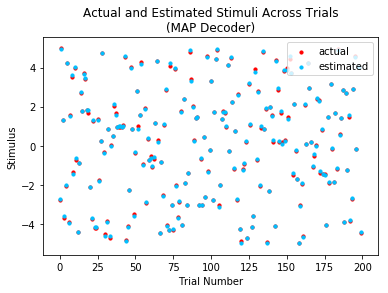

In [27]:
plt.figure(figure_num)
figure_num += 1
plt.scatter(np.arange(NUM_TRIALS), stimuli, color='r', s=10)
plt.scatter(np.arange(NUM_TRIALS), estimated_stimuli_MAP, color='deepskyblue', s=10)
plt.xlabel('Trial Number')
plt.ylabel('Stimulus')
plt.title('Actual and Estimated Stimuli Across Trials\n(MAP Decoder)')
plt.legend(['actual', 'estimated'], loc='upper right')
plt.show(block=False)

In [28]:
mean_error_MAP = np.mean(errors_MAP)
std_error_MAP = np.std(errors_MAP)
print('Error Statistics for MAP Decoder')
print('Mean of errors in stimuli estimation (absolute error is used):', mean_error_MAP)
print('Standard deviation of errors in stimuli estimation (absolute error is used):', std_error_MAP)

Error Statistics for MAP Decoder
Mean of errors in stimuli estimation (absolute error is used): 0.041783567134268555
Standard deviation of errors in stimuli estimation (absolute error is used): 0.03469756285083548


In [29]:
# PART E
print('PART E')

PART E


In [30]:
SIGMA_VALS = [0.1, 0.2, 0.5, 1, 2, 5]

In [31]:
print('Takes a while...')
np.random.seed(7) # for reproducibility
errors_std_MLE = []
for i in range(NUM_TRIALS):
    stimulus = np.random.choice(STIMULI_RANGE)
    error_std_MLE = []
    for sigma in SIGMA_VALS:
        response_std = tuning_curve(stimulus, A, MU_VALS, sigma)
        noise = np.random.normal(0, 1 / 20, NUM_NEURONS)
        response_std += noise
        estimated_stimulus_std_MLE = MLE_decoder(response_std, A, MU_VALS, sigma, STIMULI_RANGE)
        error_std_MLE.append(np.abs(stimulus - float(estimated_stimulus_std_MLE)))
    errors_std_MLE.append(np.array(error_std_MLE))
errors_std_MLE = np.array(errors_std_MLE)

Takes a while...


In [32]:
mean_errors_std_MLE = []
std_errors_std_MLE = []
for i, sigma in enumerate(SIGMA_VALS):
    mean_error_std_MLE = np.mean(errors_std_MLE[:, i])
    std_error_std_MLE = np.std(errors_std_MLE[:, i])
    print('\nError Statistics for MLE Decoder (sigma = %.1f for the tuning curve)' % sigma)
    print('Mean of errors in stimuli estimation (absolute error is used):', mean_error_std_MLE)
    print('Standard deviation of errors in stimuli estimation (absolute error is used):', std_error_std_MLE)
    mean_errors_std_MLE.append(mean_error_std_MLE)
    std_errors_std_MLE.append(std_error_std_MLE)


Error Statistics for MLE Decoder (sigma = 0.1 for the tuning curve)
Mean of errors in stimuli estimation (absolute error is used): 1.6338677354709419
Standard deviation of errors in stimuli estimation (absolute error is used): 2.4175380499447843

Error Statistics for MLE Decoder (sigma = 0.2 for the tuning curve)
Mean of errors in stimuli estimation (absolute error is used): 0.4335671342685371
Standard deviation of errors in stimuli estimation (absolute error is used): 1.1435024578429585

Error Statistics for MLE Decoder (sigma = 0.5 for the tuning curve)
Mean of errors in stimuli estimation (absolute error is used): 0.030861723446893797
Standard deviation of errors in stimuli estimation (absolute error is used): 0.031100241658623403

Error Statistics for MLE Decoder (sigma = 1.0 for the tuning curve)
Mean of errors in stimuli estimation (absolute error is used): 0.04108216432865732
Standard deviation of errors in stimuli estimation (absolute error is used): 0.02860541567859759

Error

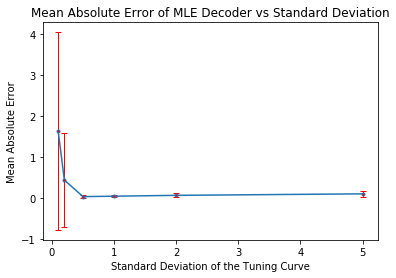

In [33]:
plt.figure(figure_num)
figure_num += 1
plt.errorbar(SIGMA_VALS, mean_errors_std_MLE, yerr=std_errors_std_MLE,
             marker='.', markerfacecolor='r', ecolor='r', elinewidth=1, capsize=3)
plt.xlabel('Standard Deviation of the Tuning Curve')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of MLE Decoder vs Standard Deviation')
plt.show(block=False)

In [34]:
plt.show()